<a href="https://colab.research.google.com/github/AnaAleixo/Projeto-Apl-IV/blob/main/Notebook_do_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

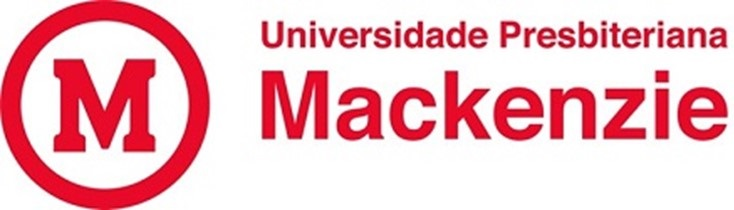

# PROJETO APLICADO IV - Ci√™ncia de Dados EaD - 2025/01
## Entrega 3

# An√°lise e Previs√£o da Evas√£o Escolar na Educa√ß√£o Infantil: Uma Abordagem de S√©ries Temporais com Foco em Pol√≠ticas P√∫blicas

# **Notebook**


**PIPELINE DA METODOLOGIA- EDA**

Pipeline metodol√≥gico da EDA, etapa por etapa, com os objetivos de cada a√ß√£o e explica√ß√£o do uso dos dados do Censo Escolar (2020‚Äì2024), foco na evas√£o escolar na Educa√ß√£o Infantil, objetivando criar um modelo de s√©rie temporal.

**1. Etapa de An√°lise Explorat√≥ria dos Dados (EDA)**
  * 1.1 Compreens√£o da fonte de dados
    - Origem: Censo Escolar (INEP) ‚Äì 2020 a 2024
    - Vari√°vel observada: N√∫mero de alunos matriculados na Educa√ß√£o Infantil
    - Segmenta√ß√µes:
    - Etapa: Creche e Pr√©-escola
    - Turno: Parcial e Integral
    - Rede/localiza√ß√£o: Estadual/Municipal, Urbana/Rural
    - Objetivo: Conhecer a estrutura dos dados, suas segmenta√ß√µes e refletir sobre o que pode influenciar a evas√£o (ex: localiza√ß√£o, tipo de turno, etc.).

  * **1.2 Leitura e limpeza dos dados**
    - 	Importa√ß√£o da planilha em .xlsx com a estrutura padronizada.
    - 	Defini√ß√£o correta dos nomes das colunas (Etapa, Turno, Rede_Localizacao, Ano, Total).
    - 	Convers√£o das colunas Ano e Total para tipos num√©ricos (int, float).
    - Objetivo: Garantir que os dados estejam no formato correto para an√°lises estat√≠sticas e temporais, evitando erros futuros no modelo.

  * **1.3 Segmenta√ß√£o por grupo de an√°lise**
    - Dividimos os dados em 4 subconjuntos:
      1.	Educa√ß√£o Infantil ‚Äì Turno Parcial
      2.	Educa√ß√£o Infantil ‚Äì Turno Integral
      3.	Pr√©-escola ‚Äì Turno Parcial
      4.	Pr√©-escola ‚Äì Turno Integral
    - Objetivo: Analisar padr√µes individualmente dentro de cada realidade, j√° que a evas√£o pode se comportar de forma diferente entre esses grupos.

  * **1.4 An√°lise visual (gr√°ficos de linha por ano)**
    -	Evolu√ß√£o das matr√≠culas ao longo dos anos, separadas por Rede_Localizacao.
    -	Uso de escala logar√≠tmica quando h√° grande discrep√¢ncia entre redes.
    -	Gr√°ficos espec√≠ficos para grupos pequenos (ex: Estadual Urbana), com visualiza√ß√£o isolada.
    - Objetivo: Identificar tend√™ncias temporais, quedas abruptas ou crescimentos incomuns que podem indicar pontos de aten√ß√£o para pol√≠ticas p√∫blicas.

  - **1.5 Estat√≠stica descritiva por grupo**
    -	C√°lculo de m√©dia, desvio padr√£o, valores m√≠nimo e m√°ximo por grupo.
    -	Avalia√ß√£o da dispers√£o entre redes e turnos.
    - Objetivo: Ter uma vis√£o num√©rica da concentra√ß√£o ou variabilidade dos dados, ajudando a entender se o comportamento √© homog√™neo ou desigual entre as categorias.

## **Por que seguimos esse caminho?**
  - a) Come√ßamos pela estrutura√ß√£o dos dados para garantir consist√™ncia na base.
  - b)	Optamos por uma EDA segmentada porque a evas√£o escolar tem m√∫ltiplos determinantes contextuais (ex: rede municipal rural pode ter comportamento diferente da rede estadual urbana).
  - c) 	A an√°lise visual serve para apoiar a modelagem futura: conseguimos avaliar se as s√©ries t√™m tend√™ncia, sazonalidade ou rupturas, o que ser√° essencial para a escolha e calibra√ß√£o dos modelos preditivos (como Prophet ou ARIMA).


## Etapa da EDA para Modelagem de S√©ries Temporais - Evas√£o Escolar

In [1]:
# Notebook: EDA para Modelagem de S√©ries Temporais - Evas√£o Escolar

# 1. Importa√ß√£o de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Leitura e prepara√ß√£o inicial dos dados
df = pd.read_excel('/content/dadosit1.xlsx', header=1)
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df['Ano'] = df['Ano'].astype(int)
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

In [3]:
# 3. Divis√£o dos dados em grupos
inf_parcial = df[(df['Etapa'] == 'Educa√ß√£o Infantil') & (df['Turno'] == 'Parcial')]
inf_integral = df[(df['Etapa'] == 'Educa√ß√£o Infantil') & (df['Turno'] == 'Integral')]
pre_parcial = df[(df['Etapa'] == 'Pr√©-escola') & (df['Turno'] == 'Parcial')]
pre_integral = df[(df['Etapa'] == 'Pr√©-escola') & (df['Turno'] == 'Integral')]

In [4]:
# 4. Fun√ß√£o para EDA por grupo
def eda_grupo(df_grupo, titulo):
    print(f"\nEstat√≠sticas descritivas - {titulo}:")
    print(df_grupo['Total'].describe())

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_grupo, x='Ano', y='Total', hue='Rede_Localizacao', marker='o')
    plt.yscale('log')
    plt.title(f'{titulo} por Rede/Localiza√ß√£o (Escala Logar√≠tmica)')
    plt.xlabel('Ano')
    plt.ylabel('Total de Matr√≠culas/Evas√µes (log)')
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()


Estat√≠sticas descritivas - Educa√ß√£o Infantil - Parcial:
count        21.000000
mean     267843.619048
std      360827.448478
min         365.000000
25%         885.000000
50%      174988.000000
75%      229667.000000
max      910689.000000
Name: Total, dtype: float64


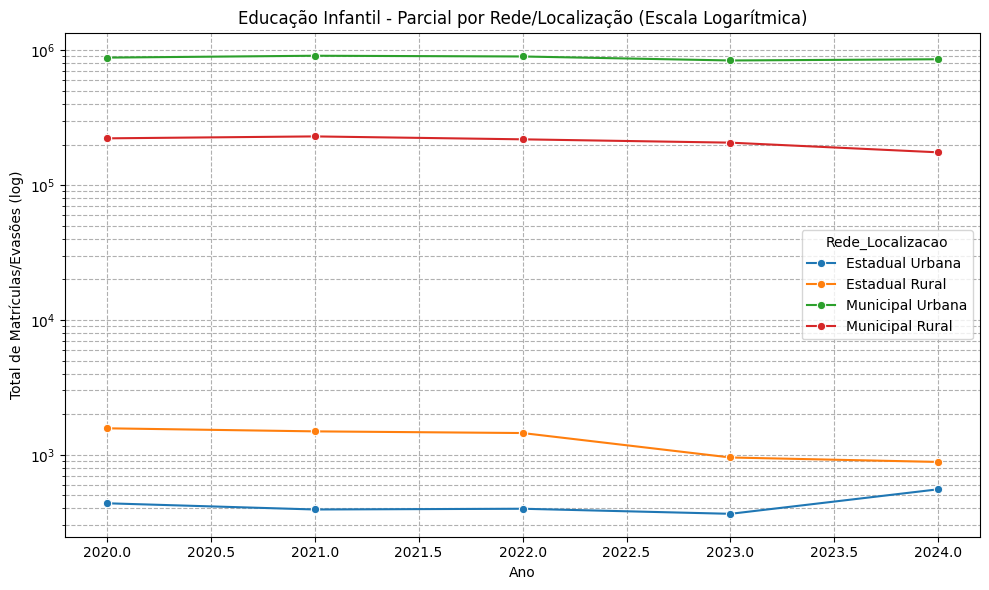


Estat√≠sticas descritivas - Educa√ß√£o Infantil - Integral:
count    2.000000e+01
mean     3.648514e+05
std      6.059682e+05
min      9.700000e+01
25%      1.008250e+03
50%      2.832050e+04
75%      3.835872e+05
max      1.513529e+06
Name: Total, dtype: float64


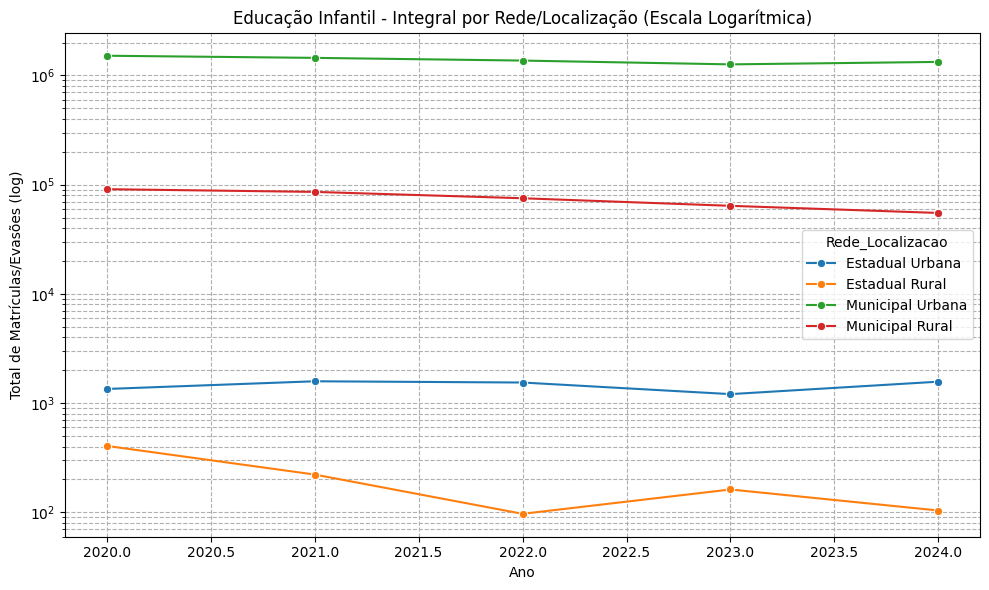


Estat√≠sticas descritivas - Pr√©-escola - Parcial:
count    2.000000e+01
mean     8.782343e+05
std      1.197803e+06
min      8.249000e+03
25%      3.364975e+04
50%      3.152505e+05
75%      1.151736e+06
max      2.932734e+06
Name: Total, dtype: float64


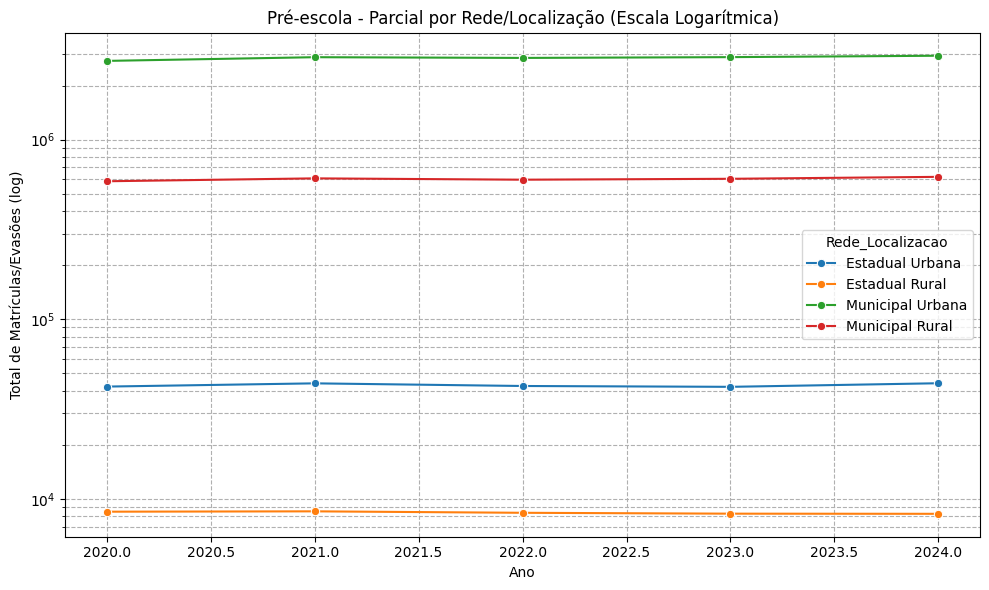


Estat√≠sticas descritivas - Pr√©-escola - Integral:
count        20.000000
mean     109424.300000
std      168777.270209
min          89.000000
25%         800.500000
50%       14979.000000
75%      137148.750000
max      456374.000000
Name: Total, dtype: float64


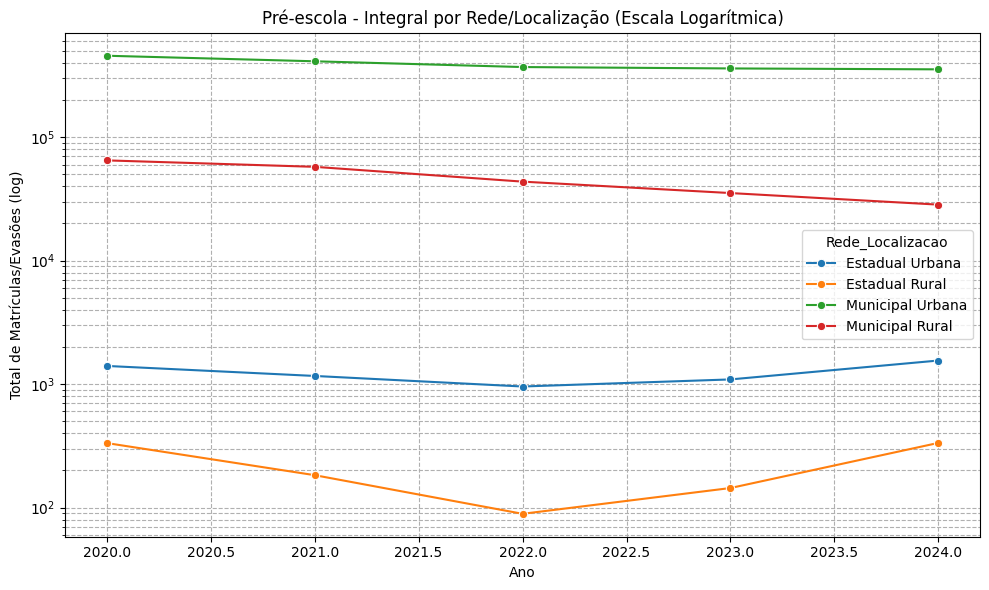

In [5]:
# 5. Execu√ß√£o da EDA para cada grupo
eda_grupo(inf_parcial, "Educa√ß√£o Infantil - Parcial")
eda_grupo(inf_integral, "Educa√ß√£o Infantil - Integral")
eda_grupo(pre_parcial, "Pr√©-escola - Parcial")
eda_grupo(pre_integral, "Pr√©-escola - Integral")


# **Relat√≥rio da An√°lise da EDA**

- **Educa√ß√£o Infantil ‚Äì Turno Parcial**
  - A distribui√ß√£o √© assim√©trica, com poucas redes muito grandes e muitas com matr√≠culas baixas. O comportamento da s√©rie deve refletir isso, o que sugere que segmentar os modelos por rede/localiza√ß√£o pode ser mais eficaz do que um modelo geral.
- **Educa√ß√£o Infantil ‚Äì Turno Integral**
    - Aqui a disparidade √© ainda maior que no parcial. A mediana mostra que mais da metade das observa√ß√µes est√£o abaixo de 30 mil, o que revela forte concentra√ß√£o em redes menores com poucos atendimentos integrais.
- **Pr√©-escola ‚Äì Turno Parcial**
    - Esse grupo concentra os maiores volumes de matr√≠cula, especialmente nas redes municipais urbanas. A alta dispers√£o mostra que alguns grupos est√£o superlotados, o que pode refletir press√£o sobre infraestrutura e risco maior de evas√£o.
- **Pr√©-escola ‚Äì Turno Integral**
  - Esse √© o grupo com menor volume absoluto, com diversas observa√ß√µes muito baixas. A mediana revela que a maioria das redes tem n√∫mero reduzido de alunos em turno integral na Pr√©-escola. Pode indicar restri√ß√£o de oferta nesse perfil.

- **Educa√ß√£o Infantil ‚Äì Turno Parcial**
  * A Municipal Urbana domina em volume de matr√≠culas, com estabilidade no per√≠odo. A Estadual Rural apresenta uma queda progressiva nas matr√≠culas, acentuada ap√≥s 2022. A Estadual Urbana possui valores baixos, mas h√° um crescimento entre 2023 e 2024. A Municipal Rural tem leve oscila√ß√£o, mas sem grandes rupturas.
    - üìå Indica√ß√£o de tend√™ncia decrescente parcial, especialmente na Estadual Rural.
- **Educa√ß√£o Infantil ‚Äì Turno Integral**
    * A Municipal Urbana novamente lidera em volume absoluto, com leve queda. A Estadual Rural apresenta valores extremamente baixos e decrescentes at√© 2022, com pequena recupera√ß√£o em 2023. A Estadual Urbana mant√©m estabilidade com pequenas oscila√ß√µes.
      - üìå Comportamento mais irregular e menos previs√≠vel, exigindo modelo que lide bem com flutua√ß√µes.

- **Pr√©-escola ‚Äì Turno Parcial**
  * As curvas s√£o praticamente est√°veis, indicando continuidade na oferta e demanda. H√° pouca varia√ß√£o entre anos, com a Municipal Urbana muito acima das demais.
    - üìå Essa s√©rie tem forte componente de estacionariedade com pequeno ru√≠do, ideal para modelos simples.

- **Pr√©-escola ‚Äì Turno Integral**
  * A Estadual Rural apresenta os menores valores e oscila√ß√£o significativa. A Municipal Urbana mant√©m padr√£o alto, por√©m com leve tend√™ncia de queda. A Municipal Rural apresenta queda progressiva.

    - üìå Um padr√£o leve de decl√≠nio que pode ser captado por um modelo com tend√™ncia suave.
  
## Escolha do Modelo de S√©rie Temporal
Com base na natureza dos dados analisados, usaremos a aplica√ß√£o do modelo Prophet, desenvolvido pelo Facebook, por apresentar as seguintes vantagens:

    ‚úÖ Trata bem s√©ries com poucos pontos (ex: 5 anos)
    ‚úÖ Modela tend√™ncia linear ou log√≠stica e sazonalidade (mesmo que m√≠nima)
    ‚úÖ Lida com anomalias e rupturas suaves com boa robustez
    ‚úÖ F√°cil interpreta√ß√£o dos componentes: tend√™ncia, sazonalidade e feriados (caso queiramos incluir)
O comportamento diferentes entre os grupos, tamb√©m contribuiu na escolha da modelagem. A modelagem ser√° realizada separadamente para cada combina√ß√£o de Etapa + Turno + Rede, para possibilitar prever com mais sensibilidade os riscos de evas√£o.

# **PIPELINE DA METODOLOGIA- ST**

**1.0 Sele√ß√£o e prepara√ß√£o da s√©rie temporal**

Para cada combina√ß√£o de Etapa, Turno e Rede/Localiza√ß√£o, √© constru√≠da uma s√©rie temporal com duas colunas obrigat√≥rias para o Prophet:
* ds: representa a data ou o ano no formato yyyy-mm-dd
* y: representa o valor observado (n√∫mero de matr√≠culas)
    
Essa estrutura padronizada √© requerida pelo Prophet para an√°lise e previs√£o temporal.

**1.1 Divis√£o dos dados para treinamento e valida√ß√£o**

Dado que a s√©rie possui apenas cinco pontos (2020 a 2024), foi adotada uma estrat√©gia de valida√ß√£o pr√°tica e √©tica para evitar perda excessiva de informa√ß√£o:
  -	O modelo √© inicialmente treinado com os dados de 2020 a 2023.
  -	Em seguida, realiza-se a valida√ß√£o usando o ano de 2024, com o intuito de avaliar se a tend√™ncia projetada se confirma com os dados mais recentes.
  Essa abordagem do tipo **‚Äúholdout temporal‚Äù** √© recomendada para s√©ries curtas, pois permite avaliar a capacidade preditiva do modelo sem comprometer sua estabilidade.

Ap√≥s a valida√ß√£o, o modelo √© reentrenado com toda a s√©rie hist√≥rica (2020‚Äì2024) para gerar as previs√µes para os anos seguintes (ex: 2025 a 2027).

**1.3 Instancia√ß√£o e configura√ß√£o do modelo Prophet**

Um modelo Prophet b√°sico √© instanciado com tend√™ncia linear. A configura√ß√£o padr√£o √© suficiente para s√©ries curtas com baixa ou nenhuma sazonalidade aparente, como √© o caso das s√©ries analisadas. Ajustes adicionais podem ser aplicados conforme o comportamento dos dados.

**1.4 Treinamento do modelo**

O modelo √© ajustado com base nos dados de treino (2020‚Äì2023) e, posteriormente, com todos os dados dispon√≠veis para gerar previs√µes reais. O Prophet identifica padr√µes de tend√™ncia e, se necess√°rio, ajusta automaticamente quebras ou altera√ß√µes estruturais da s√©rie.

**1.5 Gera√ß√£o da previs√£o e visualiza√ß√£o**

A previs√£o √© realizada para os anos futuros (por exemplo, 2025 a 2027) com a fun√ß√£o make_future_dataframe. O Prophet gera visualiza√ß√µes autom√°ticas que incluem a tend√™ncia da s√©rie, intervalo de confian√ßa e, se aplic√°vel, componentes sazonais.



Modelando: Educa√ß√£o Infantil / Parcial / Estadual Rural


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsfon5i3/9bgvl57v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsfon5i3/neh42xcg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67964', 'data', 'file=/tmp/tmpjsfon5i3/9bgvl57v.json', 'init=/tmp/tmpjsfon5i3/neh42xcg.json', 'output', 'file=/tmp/tmpjsfon5i3/prophet_modelq3ev6zhj/prophet_model-20250421190654.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:06:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:06:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


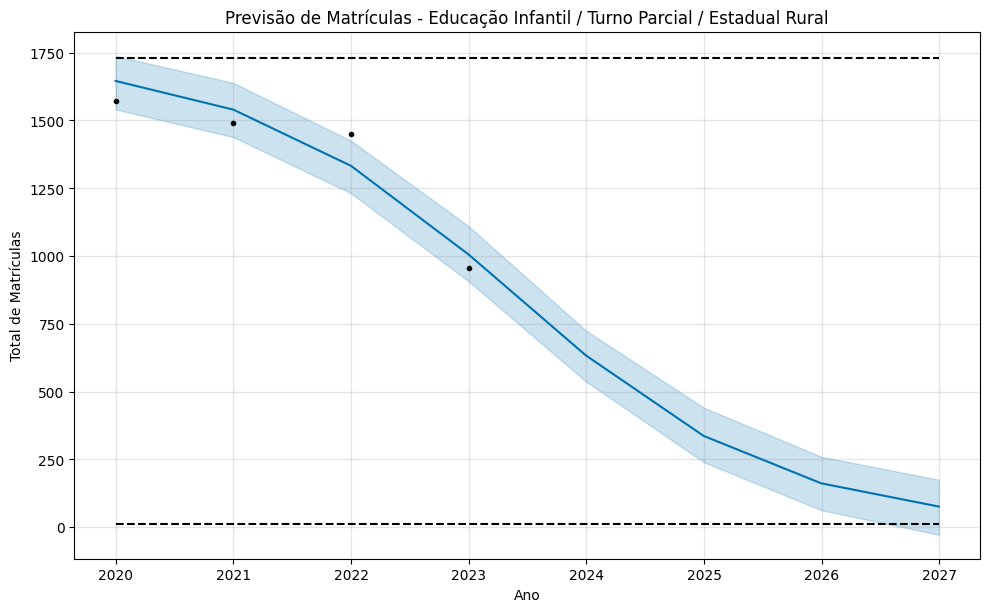

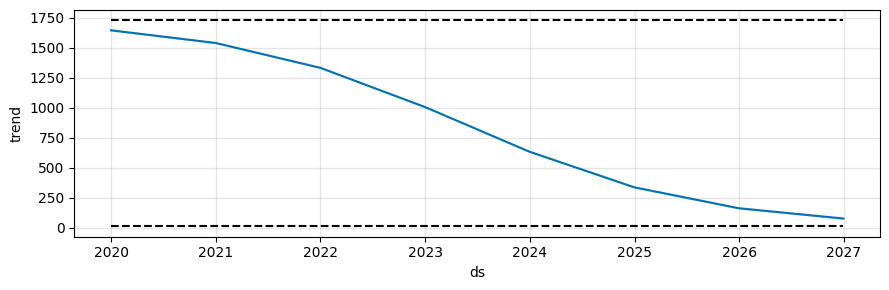

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsfon5i3/vlitcb9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsfon5i3/bgum2qry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58361', 'data', 'file=/tmp/tmpjsfon5i3/vlitcb9s.json', 'init=/tmp/tmpjsfon5i3/bgum2qry.json', 'output', 'file=/tmp/tmpjsfon5i3/prophet_modelt15yne4_/prophet_model-20250421190655.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:06:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:06:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds        yhat  yhat_lower  yhat_upper
4 2023-12-31  633.683732  537.694112  725.408290
5 2024-12-31  336.405311  239.760742  440.927655
6 2025-12-31  161.594878   62.702741  259.599930
7 2026-12-31   75.971810  -28.147320  175.140896

Modelando: Educa√ß√£o Infantil / Integral / Estadual Rural


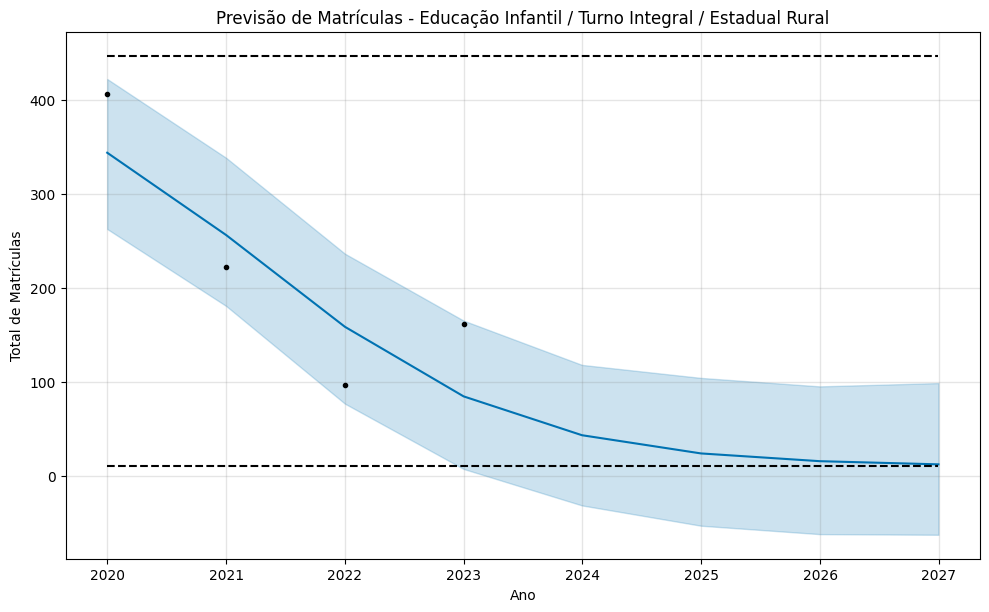

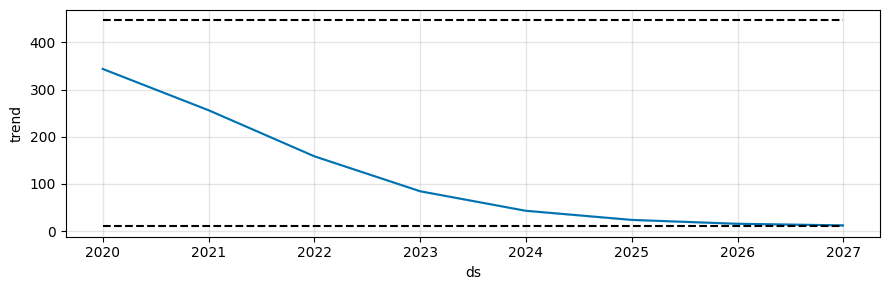

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsfon5i3/zo7lh2oh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsfon5i3/57rgd4sb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22398', 'data', 'file=/tmp/tmpjsfon5i3/zo7lh2oh.json', 'init=/tmp/tmpjsfon5i3/57rgd4sb.json', 'output', 'file=/tmp/tmpjsfon5i3/prophet_model9jm7gq0q/prophet_model-20250421190656.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:06:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:06:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds       yhat  yhat_lower  yhat_upper
4 2023-12-31  43.250775  -31.422302  118.034561
5 2024-12-31  23.880444  -52.993902  104.193093
6 2025-12-31  15.650670  -61.937347   95.195767
7 2026-12-31  12.274114  -62.623892   98.685814

Modelando: Pr√©-escola / Parcial / Estadual Rural


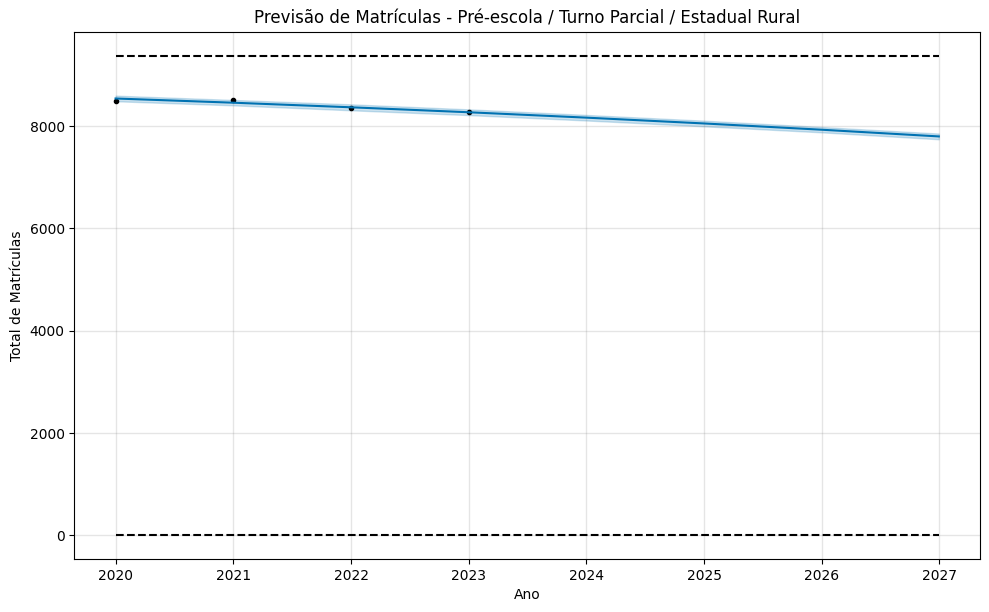

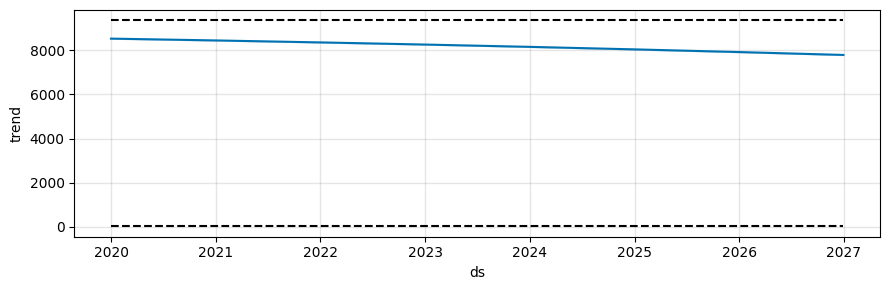

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsfon5i3/wv1d4u_h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsfon5i3/emh7cg62.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2477', 'data', 'file=/tmp/tmpjsfon5i3/wv1d4u_h.json', 'init=/tmp/tmpjsfon5i3/emh7cg62.json', 'output', 'file=/tmp/tmpjsfon5i3/prophet_model7guy8jzm/prophet_model-20250421190656.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:06:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:06:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds         yhat   yhat_lower   yhat_upper
4 2023-12-31  8161.463841  8105.979175  8214.260193
5 2024-12-31  8047.689354  7992.269591  8101.885041
6 2025-12-31  7925.419663  7874.292819  7977.884537
7 2026-12-31  7794.031808  7738.381695  7849.877789

Modelando: Pr√©-escola / Integral / Estadual Rural


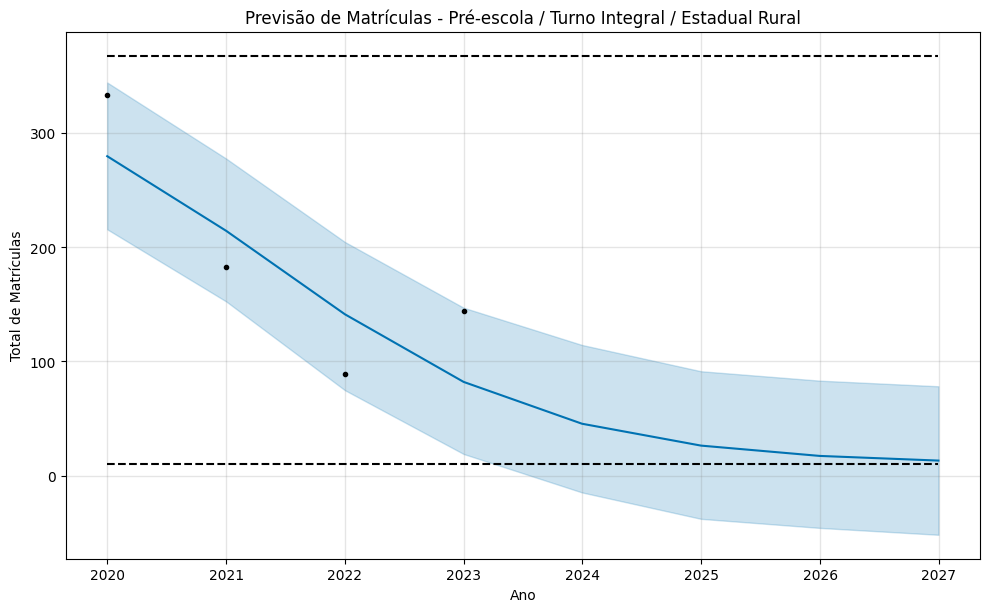

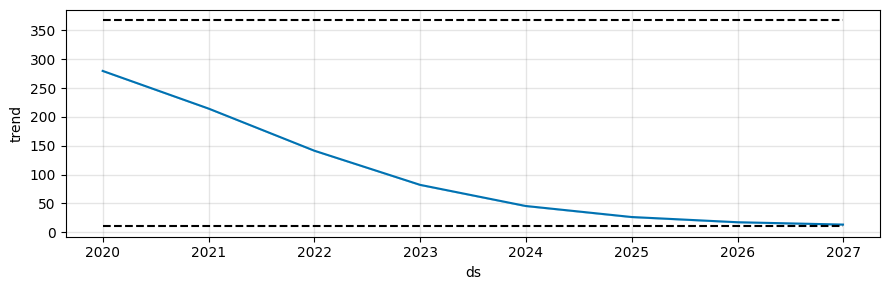

          ds       yhat  yhat_lower  yhat_upper
4 2023-12-31  45.460382  -14.681356  114.401690
5 2024-12-31  26.310054  -37.793900   91.395569
6 2025-12-31  17.284593  -45.719249   83.167167
7 2026-12-31  13.206581  -51.741941   78.255956


In [1]:
# Notebook: Modelagem de S√©ries Temporais com Prophet - Evas√£o Escolar

# 1. Instala√ß√£o e importa√ß√£o das bibliotecas
!pip install prophet --quiet

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# 2. Leitura dos dados (ajuste o caminho conforme o seu arquivo)
df = pd.read_excel('/content/dadosit1.xlsx', header=1)
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df['Ano'] = df['Ano'].astype(int)
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# 3. Lista de combina√ß√µes para modelar
combinacoes = [
    ("Educa√ß√£o Infantil", "Parcial", "Estadual Rural"),
    ("Educa√ß√£o Infantil", "Integral", "Estadual Rural"),
    ("Pr√©-escola", "Parcial", "Estadual Rural"),
    ("Pr√©-escola", "Integral", "Estadual Rural")
]

# 4. Loop para modelagem de cada combina√ß√£o
for etapa, turno, rede in combinacoes:
    print(f"\nModelando: {etapa} / {turno} / {rede}")

    df_filtro = df[
        (df['Etapa'] == etapa) &
        (df['Turno'] == turno) &
        (df['Rede_Localizacao'] == rede)
    ]

    df_prophet = df_filtro[['Ano', 'Total']].copy()
    df_prophet['ds'] = pd.to_datetime(df_prophet['Ano'].astype(str) + '-01-01')
    df_prophet['y'] = df_prophet['Total']

    # Define cap e floor para crescimento log√≠stico
    cap_max = df_prophet['y'].max() * 1.1  # 10% acima do m√°ximo observado
    df_prophet['cap'] = cap_max
    df_prophet['floor'] = 10
    df_prophet = df_prophet[['ds', 'y', 'cap', 'floor']]

    train = df_prophet[df_prophet['ds'].dt.year < 2024]
    test = df_prophet[df_prophet['ds'].dt.year == 2024]

    model = Prophet(growth='logistic', n_changepoints=2, yearly_seasonality=False)
    model.fit(train)

    future = model.make_future_dataframe(periods=4, freq='YE')
    future['cap'] = cap_max
    future['floor'] = 10

    forecast = model.predict(future)

    # Visualiza√ß√£o da previs√£o
    fig1 = model.plot(forecast)
    plt.title(f'Previs√£o de Matr√≠culas - {etapa} / Turno {turno} / {rede}')
    plt.xlabel('Ano')
    plt.ylabel('Total de Matr√≠culas')
    plt.grid(True)
    plt.show()

    # Visualiza√ß√£o dos componentes (sem sazonalidade)
    fig2 = model.plot_components(forecast)
    plt.tight_layout()
    plt.show()

    # Previs√£o dos anos futuros
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4))


**# Relat√≥rio da An√°lise da ST**

**Pipeline da Modelagem de S√©ries Temporais com Prophet**

**1. An√°lise dos resultados por grupo**

  - Educa√ß√£o Infantil ‚Äì Turno Parcial ‚Äì Estadual Rural
  -	Tend√™ncia claramente decrescente.
  -	O modelo prev√™ queda cont√≠nua at√© cerca de 200 matr√≠culas em 2027.
  -	Indica um esvaziamento progressivo na rede estadual rural para esse perfil de atendimento.
  Educa√ß√£o Infantil ‚Äì Turno Integral ‚Äì Estadual Rural
  - Volume de matr√≠culas muito reduzido j√° em 2023 (~150).
  - 	O modelo prev√™ estabiliza√ß√£o em torno de 100 alunos, gra√ßas ao piso log√≠stico aplicado.
  - 	A curva sugere uma poss√≠vel resist√™ncia residual, mas a evas√£o ou falta de oferta pode consolidar o fim da modalidade se n√£o houver interven√ß√£o.
  Pr√©-escola ‚Äì Turno Parcial ‚Äì Estadual Rural
  -	Mant√©m uma tend√™ncia mais est√°vel, mas com leve decl√≠nio.
  -	O volume total √© maior (~8 mil alunos), o que indica que essa etapa e turno ainda t√™m capilaridade mesmo em √°reas rurais.
  Pr√©-escola ‚Äì Turno Integral ‚Äì Estadual Rural (com base no gr√°fico anterior)
  - Prov√°vel cen√°rio de quase extin√ß√£o da oferta nos pr√≥ximos anos.
  -	Previs√£o pr√≥xima de zero caso n√£o haja est√≠mulo governamental.

**2. Insights e implica√ß√µes dos resultados**
  -	H√° um padr√£o claro de retra√ß√£o na oferta p√∫blica estadual rural para Educa√ß√£o Infantil.
  -	O turno integral √© o mais vulner√°vel, com queda acentuada e pouca sustenta√ß√£o.
  -	A Pr√©-escola parcial ainda se mant√©m, mas com risco de queda gradual se nada for feito.
  -	O modelo mostra que, sem interven√ß√£o, a evas√£o pode ser confundida com descontinuidade da oferta.

3. Recomenda√ß√µes de pol√≠ticas p√∫blicas com base na modelagem
Manuten√ß√£o e refor√ßo da oferta em regi√µes cr√≠ticas
  -	Identificar munic√≠pios com maior queda e elaborar planos de continuidade da rede estadual.
  -	Estimular conv√™nios com redes municipais para manter a cobertura na zona rural.
  Foco na amplia√ß√£o do turno integral
  -	Criar incentivos financeiros e estruturais para escolas rurais oferecerem o turno integral.
  -	Investir em transporte escolar e alimenta√ß√£o, que s√£o gargalos na perman√™ncia das crian√ßas.
  Monitoramento cont√≠nuo com modelos preditivos
  -	Utilizar ferramentas como Prophet anualmente para prever tend√™ncias e agir preventivamente.
  -	Incorporar indicadores de vulnerabilidade social e demanda reprimida para compor modelos mais robustos.
  Pol√≠ticas centradas na fam√≠lia e no territ√≥rio
  -	Envolver lideran√ßas comunit√°rias e conselhos escolares para entender os motivos da queda.
  -	Integrar com outras pol√≠ticas (sa√∫de, assist√™ncia social, trabalho) para fortalecer a perman√™ncia escolar.

4. Conclus√£o

A modelagem com Prophet permitiu evidenciar tend√™ncias preocupantes de evas√£o ou descontinuidade da oferta educacional, especialmente em zonas rurais e no turno integral. O uso de s√©ries temporais oferece √† gest√£o p√∫blica uma ferramenta valiosa para antecipar problemas e formar pol√≠ticas p√∫blicas baseadas em dados reais.

